In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer


In [10]:
from google.colab import files
uploaded = files.upload()


Saving HousingData.csv to HousingData (1).csv


In [11]:
df = pd.read_csv("HousingData.csv")
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [12]:
df.isna().sum()


,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


In [13]:
X = df.drop(columns=['MEDV'])
y = df['MEDV']


In [14]:
imputer = SimpleImputer(strategy='mean')

X = imputer.fit_transform(X)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [16]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [17]:
mlp = MLPRegressor(
    hidden_layer_sizes=(),      # No hidden layer
    activation='identity',
    solver='adam',
    learning_rate_init=0.01,
    max_iter=1000,
    random_state=42
)


In [18]:
mlp.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(activation='identity', hidden_layer_sizes=(),
             learning_rate_init=0.01, max_iter=1000, random_state=42)

In [19]:
y_pred = mlp.predict(X_test)


In [20]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 35.755235334745564
R2 Score: 0.5124315998183654


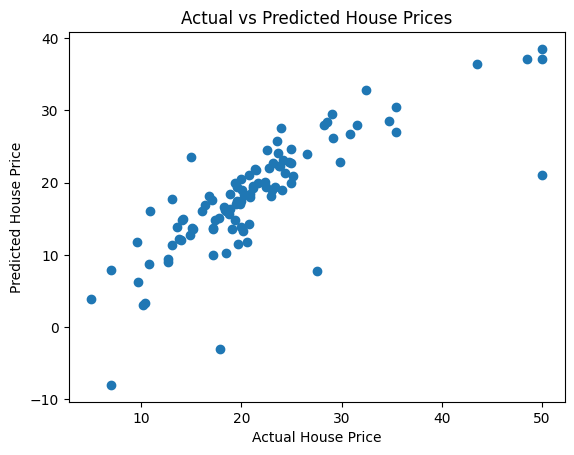

In [21]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [22]:
print("Sample Predictions:\n")
for i in range(5):
    print(f"Actual: {y_test.iloc[i]:.2f}, Predicted: {y_pred[i]:.2f}")


Sample Predictions:

Actual: 23.60, Predicted: 25.74
Actual: 32.40, Predicted: 32.82
Actual: 13.60, Predicted: 13.82
Actual: 22.80, Predicted: 21.98
Actual: 16.10, Predicted: 16.05
